In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
def _fpart(x):
    return x - int(x)

 
def _rfpart(x):
    return 1.0 - _fpart(x)

 
def _round(x):
    return int(np.floor(x+0.5))


def putpixel(data, x, y, color, alpha=1.0):
    x = int(x)
    y = int(y)
    bg = data[y][x]
    
    if(alpha>1.0):
        alpha=1.

    color2 = [0.0, 0.0, 0.0]
    color2[0] = alpha * color[0] + (1.0 - alpha) * bg[0]
    color2[1] = alpha * color[1] + (1.0 - alpha) * bg[1]
    color2[2] = alpha * color[2] + (1.0 - alpha) * bg[2]
    data[x, y] = color2
    
    return data


def lineXWColor(x1, y1, x2, y2, RGB, line=[0, 0, 0]):
    dx, dy = x2-x1, y2-y1
    steep = abs(dx) < abs(dy)
    
    if steep:
        x1, y1, x2, y2 = y1, x1, y2, x2
    if x2 < x1:
        x1, x2, y1, y2 = x2, x1, y2, y1
    
    dx, dy = x2-x1, y2-y1
    gradient = dy/dx
    intery = y1 + _rfpart(x1) * gradient
    
    xend = _round(x1)
    yend = y1 + gradient * (xend - x1)
    
    xgap = _rfpart(x1 + 0.5)
    xpxl1 = xend 
    ypxl1 = int(np.floor(yend))
    
    if steep:
        RGB = putpixel(RGB, xpxl1, ypxl1, line, _rfpart(yend) * xgap)
        RGB = putpixel(RGB, xpxl1, ypxl1+1, line, _fpart(yend) * xgap)
        
        intery = yend + gradient
        xend = _round(x2)
        yend = y2 + gradient * (xend - x2)
        xgap = _fpart(x2 + 0.5)
        xpxl2 = xend 
        ypxl2 = int(np.floor(yend))
        
        RGB = putpixel(RGB, xpxl2, ypxl2, line, _rfpart(yend) * xgap)
        RGB = putpixel(RGB, xpxl2, ypxl2+1, line, _fpart(yend) * xgap)
        
        for x in range(xpxl1 + 1, xpxl2):
            RGB = putpixel(RGB, x, int(np.floor(intery)), line, _rfpart(intery) * xgap)
            RGB = putpixel(RGB, x, int(np.floor(intery))+1, line, _fpart(intery) * xgap)
            intery = intery + gradient
        
    else:
        RGB = putpixel(RGB, ypxl1, xpxl1, line, _rfpart(yend) * xgap)
        RGB = putpixel(RGB, ypxl1+1, xpxl1, line, _fpart(yend) * xgap)
        
        intery = yend + gradient
        xend = _round(x2)
        yend = y2 + gradient * (xend - x2)
        xgap = _fpart(x2 + 0.5)
        xpxl2 = xend 
        ypxl2 = int(np.floor(yend))
        
        RGB = putpixel(RGB, ypxl2, xpxl2, line, _rfpart(yend) * xgap)
        RGB = putpixel(RGB, ypxl2+1, xpxl2, line, _fpart(yend) * xgap)
        
        for x in range (xpxl1 + 1, xpxl2):
            RGB = putpixel(RGB, int(np.floor(intery)), x, line, _rfpart(intery) * xgap)
            RGB = putpixel(RGB, int(np.floor(intery))+1, x, line, _fpart(intery) * xgap)

            intery = intery + gradient
    
    return RGB

In [3]:
def lineS(x1, y1, x2, y2, RGB):
    if (x1 == x2 and y1 == y2):
        RGB[x1, y1] = 0
        return RGB
    if abs(x2 - x1) > abs(y2 - x1):
        if x2 < x1:
            x1, x2 = x2, x1
            y1, y2 = y2, y1
        a = (y2 - y1)/(x2-x1)
        for x in range(x1, x2+1):
            y = y1 + a*(x-x1)
            RGB[int(y), x] = 0
    else:   
        if y2 < y1:
            x1, x2 = x2, x1
            y1, y2 = y2, y1
        a = (x2 - x1)/(y2-y1)
        for y in range(y1, y2+1):
            x = x1 + a*(y-y1)
            RGB[y, int(x)] = 0
            
    return RGB

In [4]:
def quadrilateral(m, n, P1, P2, P3, P4, fill=0):
    assert isinstance(m, int)
    assert isinstance(n, int)
    assert isinstance(P1, (list, tuple))
    assert isinstance(P2, (list, tuple))
    assert isinstance(P3, (list, tuple))
    assert isinstance(P4, (list, tuple))

    # klepsydra/kokarda? 
    if intersect(P1, P2, P3, P4) is True:
        # przecinajace sie krawedzie
        return 0
    
    RGB=np.zeros((m, n, 3), dtype = np.uint8)
    RGB[:,:] = 255

    # linie
    RGB = lineXWColor(P1[0], P1[1], P2[0], P2[1], RGB)
    RGB = lineXWColor(P2[0], P2[1], P3[0], P3[1], RGB)
    RGB = lineXWColor(P3[0], P3[1], P4[0], P4[1], RGB)
    RGB = lineXWColor(P4[0], P4[1], P1[0], P1[1], RGB)
    
    if fill == 1:
        # czworokat na dwa trojkaty, wykorzystuje wzor Herona
        RGB = fill_it(P1, P2, P3, P4, RGB, m, n)
        
        # uzupelnia braki
        RGB = lineS(P1[0], P1[1], P3[0], P3[1], RGB)
    
    return RGB


def heron(a, b, c):
    aa = math.sqrt((b[0] - a[0])**2 + (b[1] - a[1])**2)
    bb = math.sqrt((c[0] - b[0])**2 + (c[1] - b[1])**2)
    cc = math.sqrt((a[0] - c[0])**2 + (a[1] - c[1])**2)
    
    p = (aa + bb + cc)/2
    P = math.sqrt(p * (p-aa) * (p-bb) * (p-cc))
    
    return P


def fill_it(P1, P2, P3, P4, RGB, m, n):
    for xx in range(m):
            for yy in range(n):
                try:
                    P_ABC1 = heron(P1, P2, P3)
                    P_ABQ1 = heron(P1, P2, [xx, yy])
                    P_AQC1 = heron(P1, [xx, yy], P3)
                    P_QBC1 = heron([xx, yy], P2, P3)

                    P_Q1 = P_ABQ1 + P_AQC1 + P_QBC1

                    P_ABC2 = heron(P1, P3, P4)
                    P_ABQ2 = heron(P1, P3, [xx, yy])
                    P_AQC2 = heron(P1, [xx, yy], P4)
                    P_QBC2 = heron([xx, yy], P3, P4)

                    P_Q2 = P_ABQ2 + P_AQC2 + P_QBC2
                    
                    if not P_ABC1+0.5 < P_Q1:
                        RGB[yy, xx] = 0
                    
                    if not P_ABC2+0.5 < P_Q2:
                        RGB[yy, xx] = 0
                    
                except ValueError:
                    continue
    
    return RGB


def direction(A, B, C):
    return (C[1]-A[1]) * (B[0]-A[0]) > (B[1]-A[1]) * (C[0]-A[0])


def intersect(A, B, C, D):
    # A<->B, C<->D
    return direction(A, C, D) != direction(B, C, D) and direction(A, B, C) != direction(A, B, D)

def plotted(data, filename, show=True):
    assert isinstance(filename, str)
    
    if data is 0:
        return None
    
    plt.imshow(data, interpolation='none')
    plt.imsave(filename, data, format='png')

    if show:
        plt.show()


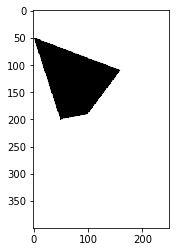

In [5]:
data1 = quadrilateral(400, 250, [1, 50], [160, 110], [100, 190], [50, 200], 1)
plotted(data1, 'proba1.png')

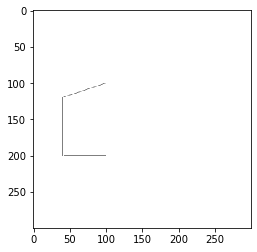

In [6]:
data2 = quadrilateral(300, 300, [40, 120], [100, 100], [100, 200], [40, 200], 0)
plotted(data2, 'proba2.png')

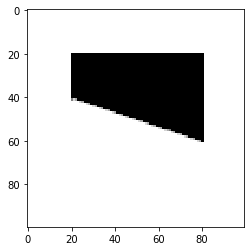

In [7]:
data3 = quadrilateral(100, 100, [20, 20], [80, 20], [80, 60], [20, 40], 1)
plotted(data3, 'proba3.png')

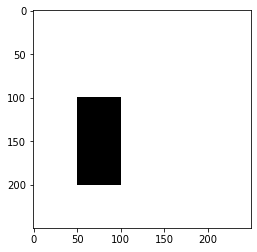

In [8]:
data4 = quadrilateral(250, 250, [50, 100], [100, 100], [100, 200], [50, 200], 1)
plotted(data4, 'proba4.png')

In [9]:
kokarda = quadrilateral(300, 300, [40, 120], [110, 220], [90, 100], [30, 200], 0)
plotted(kokarda, 'kokarda.png')
print(kokarda)

0


In [10]:
klepsydra = quadrilateral(200, 200, [50, 50], [140, 80], [50, 100], [120, 40], 0)
plotted(klepsydra, 'klepsydra.png')
print(klepsydra)

0


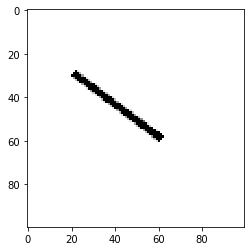

In [11]:
falsepositive_dla_a = quadrilateral(100, 100, [20, 30], [60, 60], [62, 58], [22, 28], 1)
plotted(falsepositive_dla_a, 'a.png')

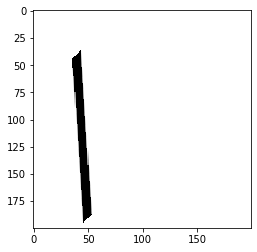

In [12]:
nowy = quadrilateral(200, 200, (36, 44), (46, 194), (53, 187), (43, 37), 1)
plotted(nowy, 'nowy.png')

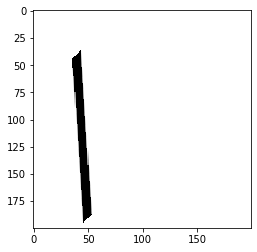

In [15]:
nowy2 = quadrilateral(50, 50, (1, 3), (9, 6), (9, 4), (1, 1), 1)
plotted(nowy, 'nowy.png')